## Contradictory, My Dear Watson

### Load Data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bert/keras/bert_base_multi/2/config.json
/kaggle/input/bert/keras/bert_base_multi/2/tokenizer.json
/kaggle/input/bert/keras/bert_base_multi/2/metadata.json
/kaggle/input/bert/keras/bert_base_multi/2/model.weights.h5
/kaggle/input/bert/keras/bert_base_multi/2/assets/tokenizer/vocabulary.txt
/kaggle/input/contradictory-my-dear-watson/sample_submission.csv
/kaggle/input/contradictory-my-dear-watson/train.csv
/kaggle/input/contradictory-my-dear-watson/test.csv


In [9]:
df_train = pd.read_csv("../input/contradictory-my-dear-watson/train.csv")
df_test = pd.read_csv("../input/contradictory-my-dear-watson/test.csv")

df_train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


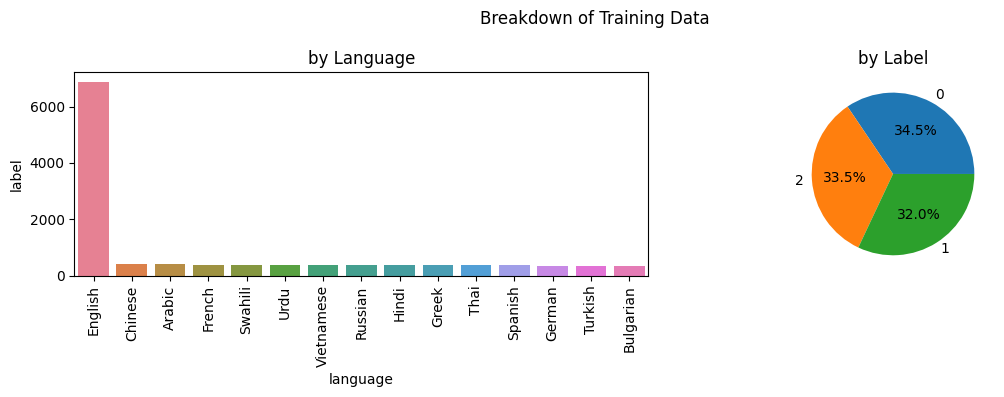

In [10]:
fig, axs = plt.subplots(figsize= (12,4), ncols= 2, nrows= 1)

dt_language = df_train.groupby("language")['label'].count().sort_values(ascending= False).reset_index()
# dt_language.loc[dt_language.label < (0.03*df_train.shape[0]), "language"] = "Other"
# dt_language = dt_language.groupby("language")['label'].sum().sort_values(ascending= False).reset_index()
sns.barplot(data= dt_language, x= "language", y= "label", hue= "language", ax= axs[0])
for tick in axs[0].get_xticklabels():
    tick.set_rotation(90)
axs[0].set_title("by Language")

axs[1].pie(df_train["label"].value_counts(), autopct='%1.1f%%', labels= df_train["label"].value_counts().index);
axs[1].set_title("by Label")

plt.suptitle("Breakdown of Training Data");
plt.tight_layout();

In [11]:
# setting up a TPU
# TODO: connect to a cloud TPU later. Currently, generates error and uses CPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
    print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1719835304.423670      13 service.cc:145] XLA service 0x5776f290e990 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719835304.423729      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1719835304.423734      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1719835304.423737      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1719835304.423753      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1719835304.423756      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1719835304.423759      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1719835304.423761      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1719835304.423764      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [12]:
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
def encode_sentence(s):
   tokens = list(tokenizer.tokenize(s))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)

encode_sentence("I love machine learning!")

[146, 16138, 21432, 26901, 106, 102]

In [32]:
import numpy as np
max_len= 50
def bert_encode(hypotheses, premises, tokenizer):
    
  num_examples = len(hypotheses)
  
  sentence1 = tf.ragged.constant([
      encode_sentence(s)
      for s in np.array(hypotheses)])
  sentence2 = tf.ragged.constant([
      encode_sentence(s)
       for s in np.array(premises)])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*sentence1.shape[0]
  input_word_ids = tf.concat([cls, sentence1, sentence2], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor()

  type_cls = tf.zeros_like(cls)
  type_s1 = tf.zeros_like(sentence1)
  type_s2 = tf.ones_like(sentence2)
  input_type_ids = tf.concat(
      [type_cls, type_s1, type_s2], axis=-1).to_tensor()

  inputs = {
      'input_word_ids': input_word_ids.to_tensor()[:,:max_len],
      'input_mask': input_mask[:,:max_len],
      'input_type_ids': input_type_ids[:,:max_len]}

  return inputs

In [33]:
train_input = bert_encode(df_train.premise.values, df_train.hypothesis.values, tokenizer)

In [35]:
def build_model():
    bert_encoder = TFBertModel.from_pretrained(model_name)
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    input_type_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_type_ids")
    
    embedding = bert_encoder([input_word_ids, input_mask, input_type_ids])[0]
    output = tf.keras.layers.Dense(3, activation='softmax')(embedding[:,0,:])
    
    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=output)
    model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [36]:
with strategy.scope():
    model = build_model()
    model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 50)]                 0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                            

In [37]:
model.fit(train_input, df_train.label.values, epochs = 2, verbose = 1, batch_size = 64, validation_split = 0.2)

Epoch 1/2


2024-07-01 12:11:36.170322: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
I0000 00:00:1719835898.822612     813 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(2481ef2f52791ea4:0:0), session_name()
I0000 00:00:1719835929.423383     813 tpu_compile_op_common.cc:245] Compilation of 2481ef2f52791ea4:0:0 with session name  took 30.600719994s and succeeded
I0000 00:00:1719835929.525949     813 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(2481ef2f52791ea4:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_train_function_3209934862216856365", property.function_library_fingerprint = 15281091706931534595, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, 

151/152 [============================>.] - ETA: 0s - loss: 1.0752 - accuracy: 0.4087

I0000 00:00:1719835942.562898     771 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(64a8c95de3539ad6:0:0), session_name()
I0000 00:00:1719835973.297733     771 tpu_compile_op_common.cc:245] Compilation of 64a8c95de3539ad6:0:0 with session name  took 30.734790216s and succeeded
I0000 00:00:1719835973.405726     771 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(64a8c95de3539ad6:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_train_function_3209934862216856365", property.function_library_fingerprint = 15281091706931534595, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,50,;4,50,;4,50,;4,;", property.guaranteed_constants_size = 0, embeddi

152/152 [==============================] - ETA: 0s - loss: 1.0745 - accuracy: 0.4094

2024-07-01 12:13:03.872992: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
I0000 00:00:1719835984.595266     771 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(c7167765f238ab39:0:0), session_name()
I0000 00:00:1719835988.591092     771 tpu_compile_op_common.cc:245] Compilation of c7167765f238ab39:0:0 with session name  took 3.995770355s and succeeded
I0000 00:00:1719835988.616101     771 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(c7167765f238ab39:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_test_function_967474457959209221", property.function_library_fingerprint = 16288875489262321663, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology

152/152 [==============================] - 147s 420ms/step - loss: 1.0745 - accuracy: 0.4094 - val_loss: 0.9535 - val_accuracy: 0.5202
Epoch 2/2


I0000 00:00:1719835993.060925     766 tpu_compile_op_common.cc:245] Compilation of 70cd3d27d2b64eeb:0:0 with session name  took 3.872945807s and succeeded
I0000 00:00:1719835993.089673     766 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(70cd3d27d2b64eeb:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_test_function_967474457959209221", property.function_library_fingerprint = 16288875489262321663, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "7,50,;7,50,;7,50,;7,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1719835993.089723     766 tpu_compilation_cache_interface.cc:541] After adding entry for key 70cd3d

152/152 [==============================] - 14s 93ms/step - loss: 0.9026 - accuracy: 0.5683 - val_loss: 0.9255 - val_accuracy: 0.5425


In [38]:
test_input = bert_encode(df_test.premise.values, df_test.hypothesis.values, tokenizer)
df_test.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [40]:
predictions = [np.argmax(i) for i in model.predict(test_input)]
submission = df_test.id.copy().to_frame()
submission['prediction'] = predictions
submission.head()

163/163 [==============================] - 3s 14ms/step


,id,prediction
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,2


In [41]:
submission.to_csv("submission.csv", index = False)